# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
#/home/amhamor/CarND/CarND-Traffic-Sign-Classifier-Project/
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file =  "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = {}".format(n_validation))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

count = 0
for label in y_test:
    if label == 42:
        count += 1
print("Proportion of Class ID 42 in the training set = {}".format(count/len(y_test)))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Proportion of Class ID 42 in the training set = 0.007125890736342043


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class ID histogram saved at ./class_id_histogram.jpg


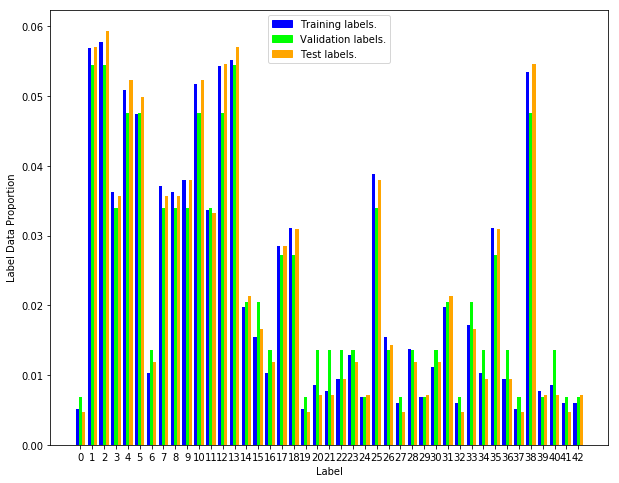

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def create_and_plot_histogram(class_data_list):
    figure = plt.figure(num=1, figsize=(10, 8))
    weights = [np.zeros_like(class_data) + (1 / len(class_data)) for class_data in class_data_list]
    histogram = plt.hist(x=class_data_list, bins=np.arange(n_classes + 1) - 0.5, weights=weights, align='mid', 
                         color=['blue', 'lime', 'orange'])
    blue_patch = mpatches.Patch(color='blue', label='Training labels.')
    lime_patch = mpatches.Patch(color='lime', label='Validation labels.')
    orange_patch = mpatches.Patch(color='orange', label='Test labels.')
    plt.legend(handles=[blue_patch, lime_patch, orange_patch], loc=9)
    plt.xlabel('Label')
    plt.ylabel('Label Data Proportion')
    plt.xticks(np.arange(n_classes))
    plt.savefig('./class_id_histogram.jpg')
    print('Class ID histogram saved at {}'.format('./class_id_histogram.jpg'))
    plt.show(histogram)
    
create_and_plot_histogram([y_train, y_valid, y_test])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from skimage import exposure

def flatten_array(array):
    return array.flatten()

def gamma_correct(image):
    return exposure.adjust_gamma(image, .50)

def convert_to_grayscale(image):
    grayscale_image = np.dot(image, [0.2989, 0.5870, 0.1140])
    return np.expand_dims(grayscale_image, 3)

def normalize_pixel_values(pixel_array_flattened, pixel_array):
    maximum_pixel_value = max(pixel_array_flattened)
    minimum_pixel_value = min(pixel_array_flattened)
    return (pixel_array - minimum_pixel_value) / (maximum_pixel_value - minimum_pixel_value)

def standardize_pixel_values(pixel_array_flattened, pixel_array):
    mean_pixel_value = np.mean(pixel_array_flattened)
    stddev_pixel_value = np.std(pixel_array_flattened)
    return (pixel_array - mean_pixel_value) / stddev_pixel_value

#X_train_grayscale = convert_to_grayscale(X_train)
#X_valid_grayscale = convert_to_grayscale(X_valid)

X_train_flattened = flatten_array(array=X_train)
X_valid_flattened = flatten_array(array=X_valid)
X_test_flattened = flatten_array(array=X_test)

X_train_normalized = normalize_pixel_values(pixel_array_flattened=X_train_flattened, pixel_array=X_train)
X_valid_normalized = normalize_pixel_values(pixel_array_flattened=X_valid_flattened, pixel_array=X_valid)
X_test_normalized = normalize_pixel_values(pixel_array_flattened=X_test_flattened, pixel_array = X_test)

X_train_standardized = standardize_pixel_values(pixel_array_flattened=X_train_flattened, pixel_array=X_train)
#X_valid_standardized = standardize_pixel_values(pixel_array_flattened=X_valid_flattened, pixel_array=X_valid)
#X_test_standardized = standardize_pixel_values(pixel_array_flattened=X_test_flattened, pixel_array=X_test)

X_train_grayscale = convert_to_grayscale(X_train)
#X_valid_grayscale = convert_to_grayscale(X_valid)
#X_test_grayscale = convert_to_grayscale(X_test)

#X_train_standardized_grayscale = convert_to_grayscale(X_train_standardized)
#X_valid_standardized_grayscale = convert_to_grayscale(X_valid_standardized)
#X_test_standardize_grayscale = convert_to_grayscale(X_test_standardized)

#X_train_gamma_corrected_flattened = gamma_correct(X_train_flattened)
#X_valid_gamma_corrected_flattened = gamma_correct(X_valid_flattened)
#X_test_gamma_corrected_flattened = gamma_correct(X_test_flattened)

X_train_gamma_corrected = gamma_correct(X_train)
#X_valid_gamma_corrected = gamma_correct(X_valid)
#X_test_gamma_corrected = gamma_correct(X_test)

#X_train_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_train_gamma_corrected_flattened, 
#                                                                pixel_array=X_train_gamma_corrected)
#X_valid_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_valid_gamma_corrected_flattened, 
#                                                                pixel_array=X_valid_gamma_corrected)
#X_test_standardized_gamma_corrected = standardize_pixel_values(pixel_array_flattened=X_test_gamma_corrected_flattened, 
#                                                                pixel_array=X_test_gamma_corrected)

In [6]:
image_index = 0

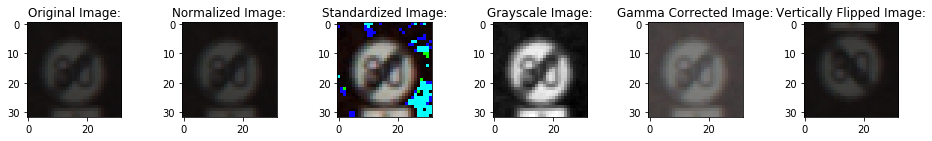

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(13, 2))
ax1.imshow(X_train[image_index])
ax1.set_title('Original Image:')
ax2.imshow(X_train_normalized[image_index])
ax2.set_title('Normalized Image:')
ax3.imshow(X_train_standardized[image_index])
ax3.set_title('Standardized Image:')
ax4.imshow(np.squeeze(X_train_grayscale[image_index]), cmap='gray')
ax4.set_title('Grayscale Image:')
ax5.imshow(X_train_gamma_corrected[image_index])
ax5.set_title('Gamma Corrected Image:')
ax6.imshow(X_train[image_index, ::-1])
ax6.set_title('Vertically Flipped Image:')
plt.tight_layout()
plt.savefig('./blurry_preprocessed_image.png')
#plt.savefig('./preprocessed_images.png')
#print('Preprocessed images saved at ./preprocessed_images.png')

image_index += 1

In [8]:
print(image_index)
image_index -= 1

1


### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def traffic_sign_classifier(input_data): #32x32x3
    weights1 = tf.Variable(tf.truncated_normal([5, 5, 3, 12], stddev=1.), dtype=tf.float32, name='weights1') 
    bias1 = tf.Variable(tf.zeros_like([12], dtype=tf.float32), name='bias1')
    conv_layer1 = tf.nn.conv2d(input=input_data, filter=weights1, strides=(1, 1, 1, 1), padding='VALID') + bias1 #28x28x12
    conv_layer1 = tf.nn.max_pool(value=conv_layer1, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME') #14x14x12
    #conv_layer1 = tf.nn.dropout(x=conv_layer1, keep_prob=0.50)
    conv_layer1 = tf.nn.relu(features=conv_layer1)
    conv_layer1_normalized = tf.nn.local_response_normalization(input=conv_layer1)
    
    weights2 = tf.Variable(tf.truncated_normal([5, 5, 12, 32], stddev=1.), dtype=tf.float32, name='weights2') 
    bias2 = tf.Variable(tf.zeros_like([32], dtype=tf.float32), name='bias2')
    conv_layer2 = tf.nn.conv2d(input=conv_layer1_normalized, filter=weights2, strides=(1, 1, 1, 1), padding='VALID') + bias2 #10x10x32
    conv_layer2 = tf.nn.max_pool(value=conv_layer2, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME') #5x5x32
    #conv_layer2 = tf.nn.dropout(x=conv_layer2, keep_prob=0.50)
    conv_layer2 = tf.nn.relu(features=conv_layer2)
    conv_layer2_normalized = tf.nn.local_response_normalization(input=conv_layer2)
    
    weights3 = tf.Variable(tf.truncated_normal([2, 2, 32, 64], stddev=1.), dtype=tf.float32, name='weights3') 
    bias3 = tf.Variable(tf.zeros_like([64], dtype=tf.float32), name='bias3')
    conv_layer3 = tf.nn.conv2d(input=conv_layer2, filter=weights3, strides=(1, 1, 1, 1), padding='VALID') + bias3 #4x4x64
    conv_layer3 = tf.nn.max_pool(value=conv_layer3, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME') #2x2x64
    #conv_layer3 = tf.nn.dropout(x=conv_layer3, keep_prob=0.50)
    conv_layer3 = tf.nn.relu(features=conv_layer3)
    conv_layer3_normalized = tf.nn.local_response_normalization(input=conv_layer3)
    
    weights4 = tf.Variable(tf.truncated_normal([256, 120], stddev=1.), name='weights4')
    bias4 = tf.Variable(tf.zeros_like([120], dtype=tf.float32), name='bias4')
    fully_connected_layer1 = tf.add(tf.matmul(tf.contrib.layers.flatten(inputs=conv_layer3_normalized), weights4), bias4)
    #fully_connected_layer1 = tf.nn.dropout(x=fully_connected_layer1, keep_prob=0.5)
    #fully_connected_layer1 = tf.nn.relu(features=fully_connected_layer1)
    
    weights5 = tf.Variable(tf.truncated_normal([120, 84], stddev=1.), name='weights5')
    bias5 = tf.Variable(tf.zeros_like([84], dtype=tf.float32), name='bias5')
    fully_connected_layer2 = tf.add(tf.matmul(fully_connected_layer1, weights5), bias5)
    #fully_connected_layer2 = tf.nn.dropout(x=fully_connected_layer2, keep_prob = 0.5)
    #fully_connected_layer2 = tf.nn.relu(features=fully_connected_layer2)
    
    weights6 = tf.Variable(tf.truncated_normal([84, 43], stddev=1.), name='weights6')
    bias6 = tf.Variable(tf.zeros_like([43], dtype=tf.float32), name='bias6')
    logits = tf.add(tf.matmul(fully_connected_layer2, weights6), bias6)
    
    return (conv_layer1_normalized, conv_layer2_normalized, conv_layer3_normalized, logits)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
epochs = 10000
batch_size = 32
learning_rate = .002

input_data = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3], name='input_data')
labels = tf.placeholder(dtype=tf.int32, shape=[None], name='labels')
labels_one_hot_encoded = tf.one_hot(indices=labels, depth=n_classes)

conv_layer1_normalized, conv_layer2_normalized, conv_layer3_normalized, logits = traffic_sign_classifier(input_data=input_data)
#logits = traffic_sign_classifier(input_data=input_data)
cost = tf.nn.softmax_cross_entropy_with_logits(labels=labels_one_hot_encoded, logits=logits)
mean_cost = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_one_hot_encoded, 1))
accuracy_mean = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate_accuracy(X_data, y_data, sess):
    X_data_number = len(X_data)
    total_accuracy = 0
    for batch_start_index in range(0, X_data_number, batch_size):
        batch_end_index = batch_start_index + batch_size if batch_start_index + batch_size <= X_data_number else None
        
        input_batch = X_data[batch_start_index:batch_end_index]
        labels_batch = y_data[batch_start_index:batch_end_index]
        
        accuracy = sess.run(accuracy_mean, feed_dict={input_data: input_batch, labels: labels_batch})
        total_accuracy += accuracy * len(input_batch)
        
    return total_accuracy / X_data_number

In [11]:
def train_model(X_train_data=X_train_normalized, y_train_data=y_train):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #saver.restore(sess, "./traffic-sign-classifier-parameters")

        for epoch in range(0, epochs):
            X_train_data, y_train_data = shuffle(X_train_data, y_train_data)

            total_accuracy = 0
            for batch_start_index in range(0, n_train, batch_size):
                batch_end_index = batch_start_index + batch_size if batch_start_index + batch_size <= n_train else None

                input_batch = X_train_data[batch_start_index:batch_end_index]
                labels_batch = y_train_data[batch_start_index:batch_end_index]
                
                #if epoch == 0 or epoch % 50 != 0:
                    #batch_index = np.random.randint(batch_size)
                sess.run(optimizer, feed_dict={input_data: input_batch, labels: labels_batch})
                #if epoch % 100 == 0 and epoch != 0:
                    #sess.run(optimizer, feed_dict={input_data: input_batch[batch_index:batch_index+1, :, ::-1], labels: labels_batch[batch_index:batch_index+1]})
                
                accuracy = sess.run(accuracy_mean, feed_dict={input_data: input_batch, labels: labels_batch})
                total_accuracy += accuracy * len(input_batch)
            total_accuracy /= n_train
                
            valid_accuracy = evaluate_accuracy(X_data=X_valid_normalized, y_data=y_valid, sess=sess)
                
            print('Epoch {}:'.format(epoch+1))
            #print('logits: {}'.format(sess.run(logits[0], feed_dict={input_data: X_train_data, labels: y_train})))
            print("Training accuracy = {}".format(total_accuracy))
            print('Validation accuracy = {}'.format(valid_accuracy))
        
            if epoch % 10 == 0:
                save_directory = 'traffic-sign-classifier-parameters'
                saver.save(sess, save_directory, global_step=epoch)
                print('Session saved at {}'.format(save_directory))
                
train_model()

Epoch 1:
Training accuracy = 0.20578177535036157
Validation accuracy = 0.23605442176870747
Session saved at traffic-sign-classifier-parameters
Epoch 2:
Training accuracy = 0.3785740969705117
Validation accuracy = 0.37528344671201813
Epoch 3:
Training accuracy = 0.5157906836728782
Validation accuracy = 0.4748299319727891
Epoch 4:
Training accuracy = 0.6461967298184912
Validation accuracy = 0.6278911564710324
Epoch 5:
Training accuracy = 0.755452742922316
Validation accuracy = 0.6841269843162052
Epoch 6:
Training accuracy = 0.8355987241303853
Validation accuracy = 0.7253968254137202
Epoch 7:
Training accuracy = 0.8864047817740072
Validation accuracy = 0.836507936670126
Epoch 8:
Training accuracy = 0.9156872323917354
Validation accuracy = 0.8074829936027527
Epoch 9:
Training accuracy = 0.933676255092206
Validation accuracy = 0.8267573698037336
Epoch 10:
Training accuracy = 0.9536480933360154
Validation accuracy = 0.8526077100208828
Epoch 11:
Training accuracy = 0.9632173338314319
Validati

Epoch 88:
Training accuracy = 0.9995114802149487
Validation accuracy = 0.9376417235722617
Epoch 89:
Training accuracy = 0.9994540072990603
Validation accuracy = 0.9553287983751622
Epoch 90:
Training accuracy = 0.999568953130837
Validation accuracy = 0.9582766441801508
Epoch 91:
Training accuracy = 0.9991953791775626
Validation accuracy = 0.9514739232809365
Session saved at traffic-sign-classifier-parameters
Epoch 92:
Training accuracy = 0.999568953130837
Validation accuracy = 0.9600907031370669
Epoch 93:
Training accuracy = 0.9994827437570045
Validation accuracy = 0.9600907029478458
Epoch 94:
Training accuracy = 0.999540216672893
Validation accuracy = 0.9517006804883615
Epoch 95:
Training accuracy = 0.9993103250093394
Validation accuracy = 0.9625850343920477
Epoch 96:
Training accuracy = 0.9991666427196184
Validation accuracy = 0.9573696147287243
Epoch 97:
Training accuracy = 0.9996264260467255
Validation accuracy = 0.9591836734153246
Epoch 98:
Training accuracy = 0.999540216672893
Val

Epoch 174:
Training accuracy = 0.9998850541682233
Validation accuracy = 0.9641723359793493
Epoch 175:
Training accuracy = 0.9996551625046697
Validation accuracy = 0.9569160999894953
Epoch 176:
Training accuracy = 0.9997126354205581
Validation accuracy = 0.9664399096754943
Epoch 177:
Training accuracy = 0.9997701083364464
Validation accuracy = 0.9623582770494647
Epoch 178:
Training accuracy = 0.9997413718785022
Validation accuracy = 0.9628117915994726
Epoch 179:
Training accuracy = 0.9997988447943906
Validation accuracy = 0.9478458053941359
Epoch 180:
Training accuracy = 0.9997413718785022
Validation accuracy = 0.9646258507185782
Epoch 181:
Training accuracy = 0.9998850541682233
Validation accuracy = 0.9643990931597426
Session saved at traffic-sign-classifier-parameters
Epoch 182:
Training accuracy = 0.9997413718785022
Validation accuracy = 0.9535147395263723
Epoch 183:
Training accuracy = 0.9999137906261674
Validation accuracy = 0.961451247354754
Epoch 184:
Training accuracy = 0.999885

Epoch 262:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 263:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 264:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 265:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 266:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 267:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 268:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 269:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 270:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 271:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Session saved at traffic-sign-classifier-parameters
Epoch 272:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 273:
Training accuracy = 1.0
Validation accuracy = 0.9734693881335442
Epoch 274:
Training accuracy = 1.0
V

KeyboardInterrupt: 

In [11]:
restore_directory = './traffic-sign-classifier-parameters-360'
with tf.Session() as sess:
    saver.restore(sess, restore_directory)
    print('Test accuracy = {}'.format(evaluate_accuracy(X_data=X_test_normalized, y_data=y_test, sess=sess)))

Test accuracy = 0.9585114806206191


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images
### Predict the Sign Type for Each Image

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
import matplotlib.image as mpimg
from scipy.misc import imresize
from scipy.misc import toimage
import csv

with open('./signnames.csv', 'r') as input_file_object:
    reader = csv.reader(input_file_object)
    next(reader)
    class_id_to_sign_name_dictionary = {int(row[0]): row[1] for row in reader}

file_name_to_id_dictionary = {'speed-limit-20-km-per-h-german-traffic-sign.jpg': 0, 
                              'speed-limit-30-km-per-h-german-traffic-sign.png': 1, 
                              'speed-limit-50-km-per-h-german-traffic-sign.jpg': 2, 
                              'speed-limit-60-km-per-h-german-traffic-sign.jpg': 3, 
                              'speed-limit-70-km-per-h-german-traffic-sign.jpg': 4, 
                              'speed-limit-80-km-per-h-german-traffic-sign.png': 5, 
                              'speed-limit-100-km-per-h-german-traffic-sign.jpg': 7, 
                              'speed-limit-120-km-per-h-german-traffic-sign.jpg': 8, 
                              'no-passing-german-traffic-sign.jpg': 9, 
                              'no-passing-by-lorries-german-traffic-sign.jpg': 10, 
                              'right-of-way-at-the-next-intersection-german-traffic-sign.jpg': 11, 
                              'priority-road-german-traffic-sign.jpg': 12, 
                              'yield-german-traffic-sign.png': 13, 
                              'stop-german-traffic-sign.png': 14, 
                              'no-vehicles-german-traffic-sign.jpg': 15, 
                              'vehicles-over-7000-pounds-prohibited-german-traffic-sign.png': 16, 
                              'no-entry-german-traffic-sign.png': 17, 
                              'general-caution-german-traffic-sign.jpg': 18, 
                              'dangerous-curve-to-the-left-german-traffic-sign.jpg': 19, 
                              'dangerous-curve-to-the-right-german-traffic-sign.jpg': 20, 
                              'double-curve-first-to-left-german-traffic-sign.png': 21, 
                              'bumpy-road-german-traffic-sign.jpg': 22, 
                              'slippery-road-german-traffic-sign.jpg': 23, 
                              'road-narrows-on-the-right-german-traffic-sign.jpg': 24, 
                              'roadwork-ahead.png': 25, 
                              'roadwork-ahead-german-traffic-sign.jpg': 25, 
                              'traffic-signals-german-traffic-sign.jpg': 26, 
                              'pedestrians-german-traffic-sign.jpg': 27, 
                              'children-crossing-german-traffic-sign.jpg': 28, 
                              'bicycles-crossing-german-traffic-sign.jpg': 29, 
                              'bicycles-crossing-german-traffic-sign-2.jpg': 29, 
                              'beware-of-ice-snow-german-traffic-sign.jpg': 30, 
                              'wild-animals-crossing-german-traffic-sign.jpg': 31, 
                              'end-of-all-speed-and-passing-limits-german-traffic-sign.jpg': 32, 
                              'turn-right-ahead-german-traffic-sign.png': 33, 
                              'turn-left-ahead-german-traffic-sign.jpg': 34, 
                              'ahead-only-german-traffic-sign.png': 35, 
                              'go-straight-or-right-german-traffic-sign.jpg': 36, 
                              'go-straight-or-left-german-traffic-sign.png': 37, 
                              'keep-right-german-traffic-sign.jpg': 38, 
                              'keep-left-german-traffic-sign.jpg': 39, 
                              'roundabout-mandatory-german-traffic-sign.png': 40, 
                              'end-of-no-passing-german-traffic-sign.jpg': 41, 
                              'end-of-no-overtaking-by-lorries-zone-german-traffic-sign.jpg': 42}

image_file_name_list = list(file_name_to_id_dictionary.keys())

def file_name_to_image_dictionary(image_file_name_list):
    file_name_to_image_dictionary = {}
    for image_file_name in image_file_name_list:
        image = mpimg.imread('./german-traffic-sign-test-images/{}'.format(image_file_name))
        image = imresize(image, (32, 32, 3))
        toimage(image, cmin=0.0, cmax=255).save('./german-traffic-sign-test-images/{}-resized.png'.format(image_file_name[:-4]))
        file_name_to_image_dictionary[image_file_name] = image
    return file_name_to_image_dictionary

file_name_to_image_dictionary = file_name_to_image_dictionary(image_file_name_list=image_file_name_list)

def get_model_prediction(image):
    with tf.Session() as sess:
        image_expanded = np.expand_dims(image, axis=0)
        saver.restore(sess, restore_directory)
        prediction = sess.run(tf.argmax(logits, 1), feed_dict={input_data: image_expanded})
        return prediction
    
def file_name_to_prediction_dictionary(image_file_name_list):
    file_name_to_prediction_dictionary = {}
    for image_file_name in image_file_name_list:
        image = file_name_to_image_dictionary[image_file_name]
        prediction = get_model_prediction(image=image)
        file_name_to_prediction_dictionary[image_file_name] = prediction
    return file_name_to_prediction_dictionary

file_name_to_prediction_dictionary = file_name_to_prediction_dictionary(image_file_name_list=image_file_name_list)

/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


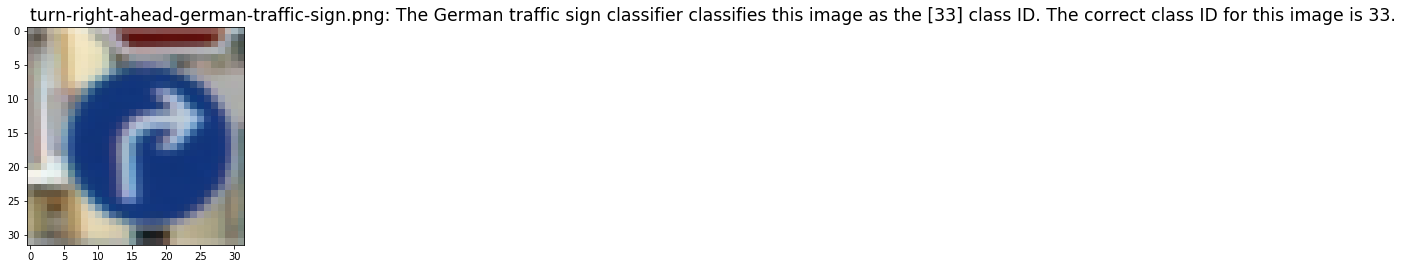

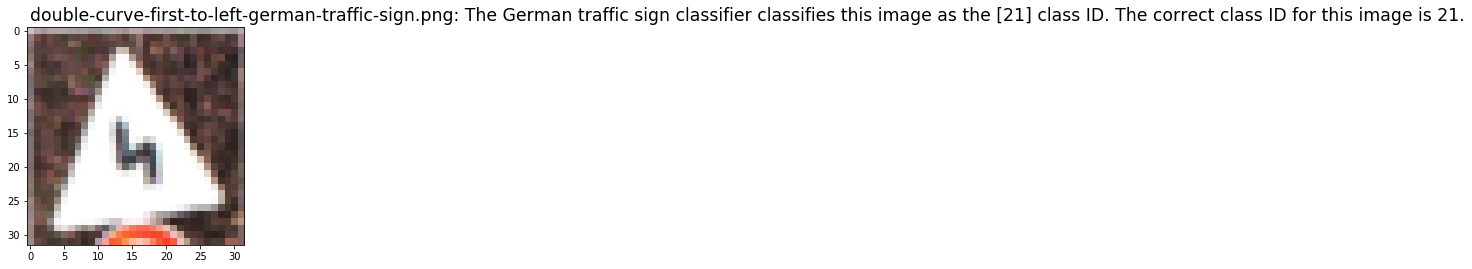

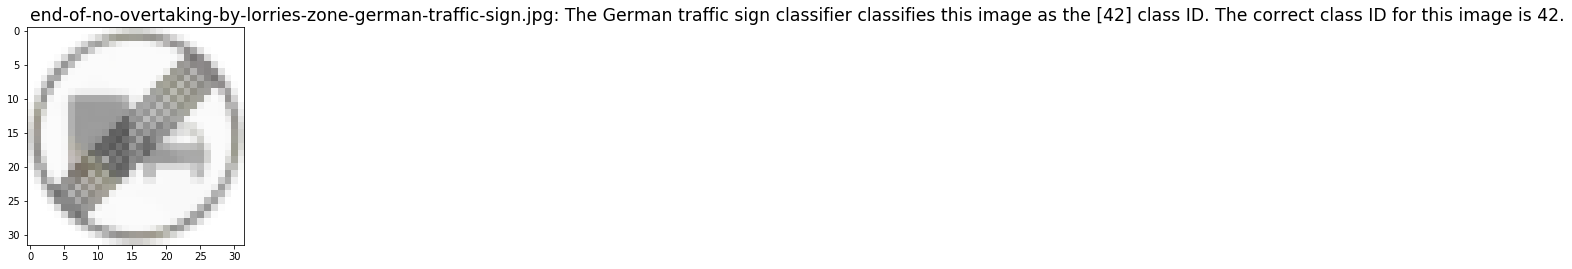

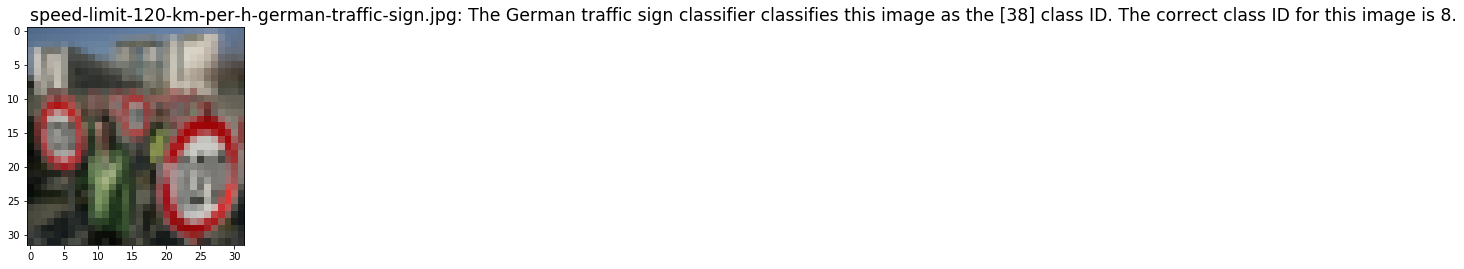

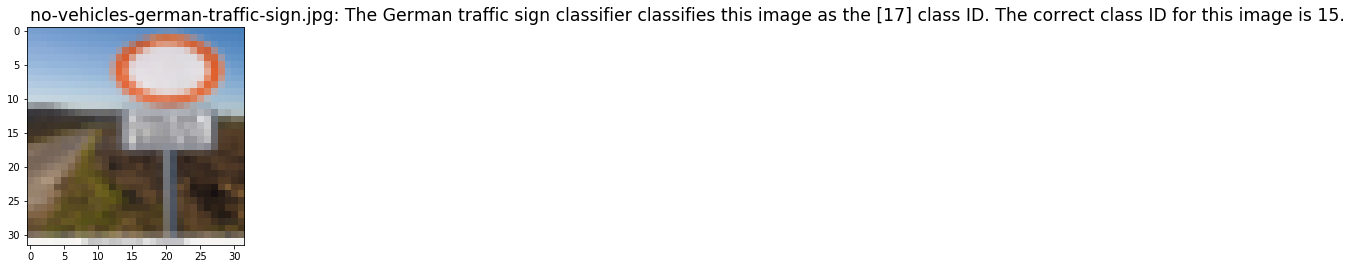

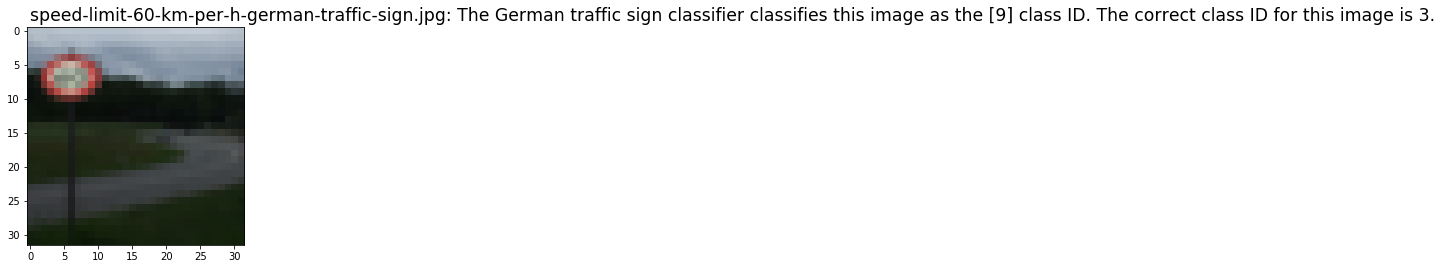

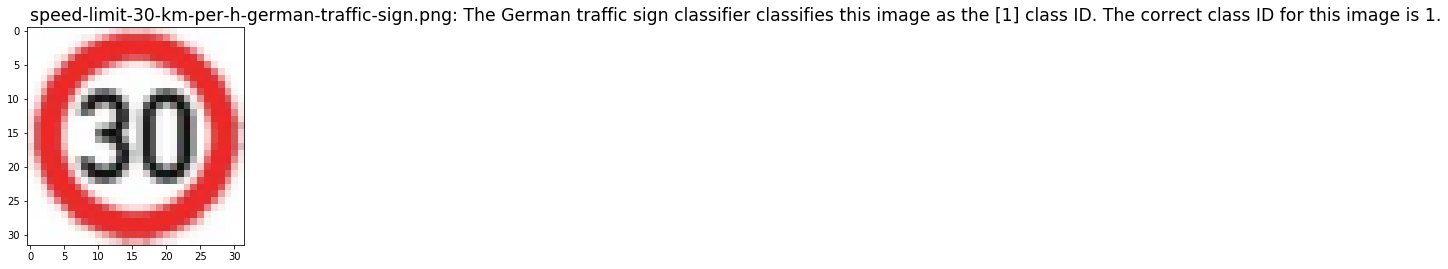

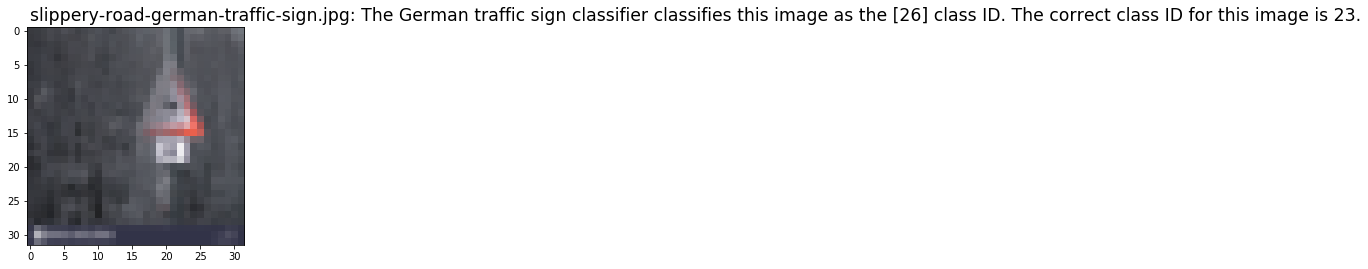

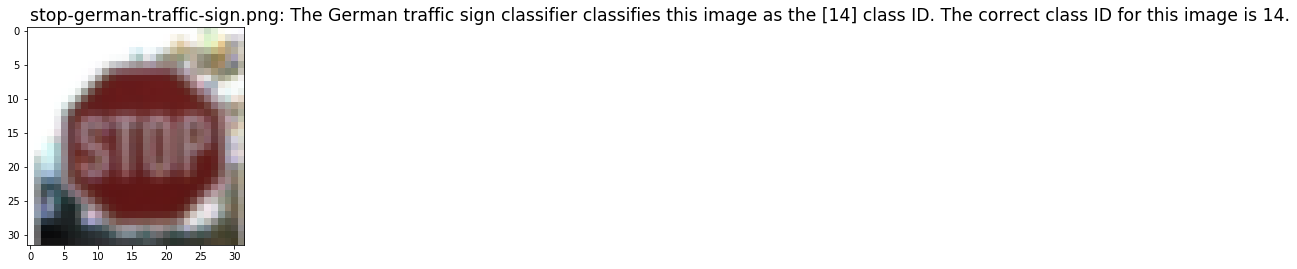

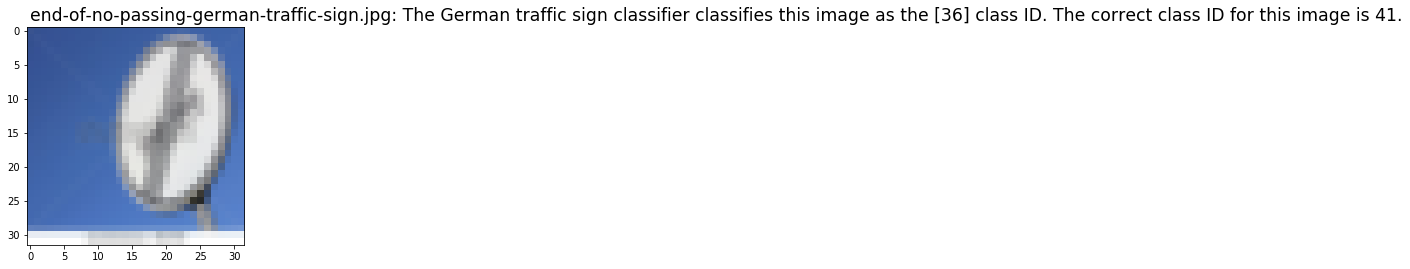

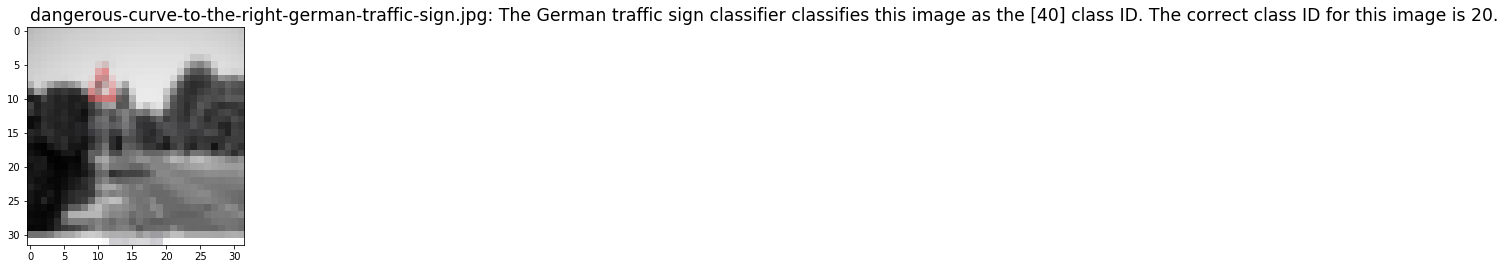

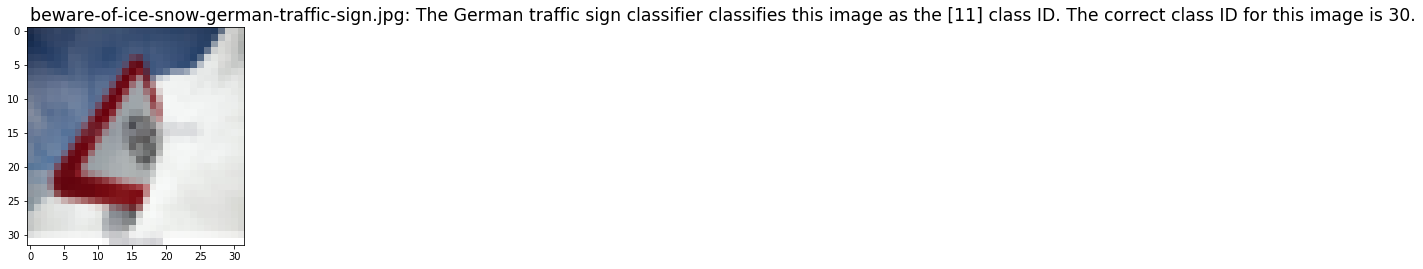

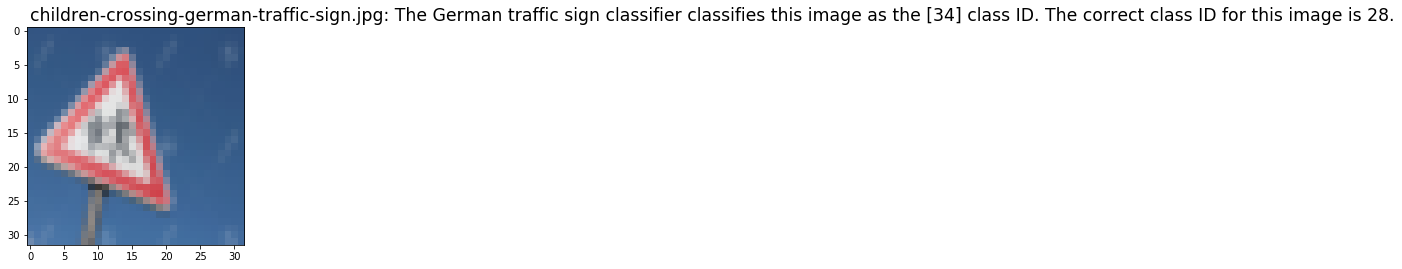

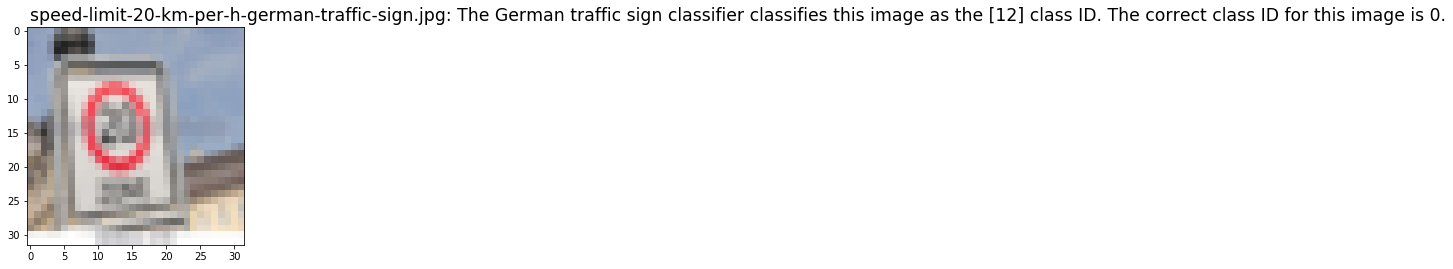

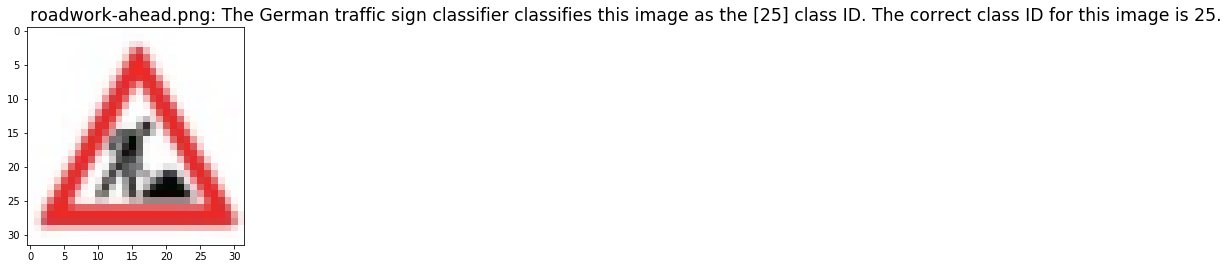

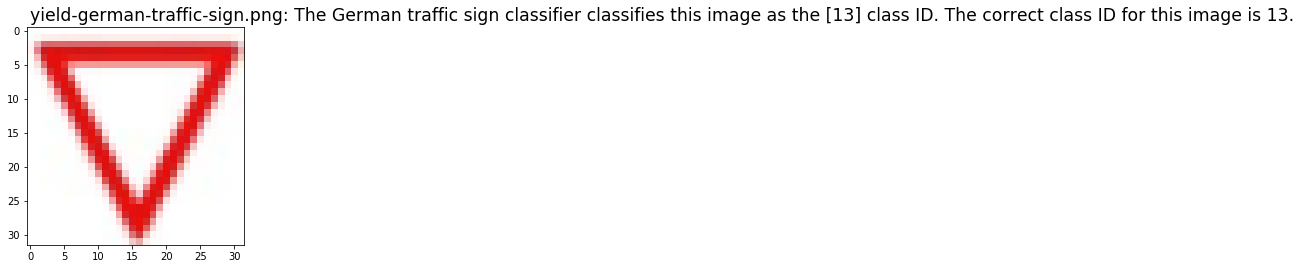

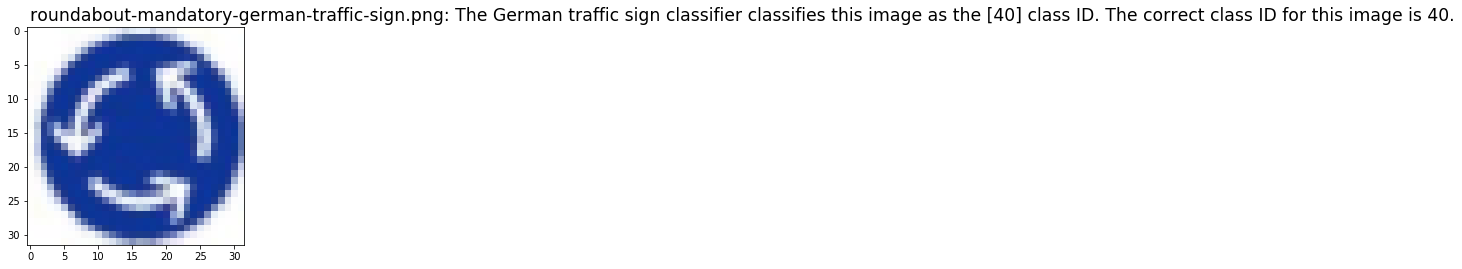

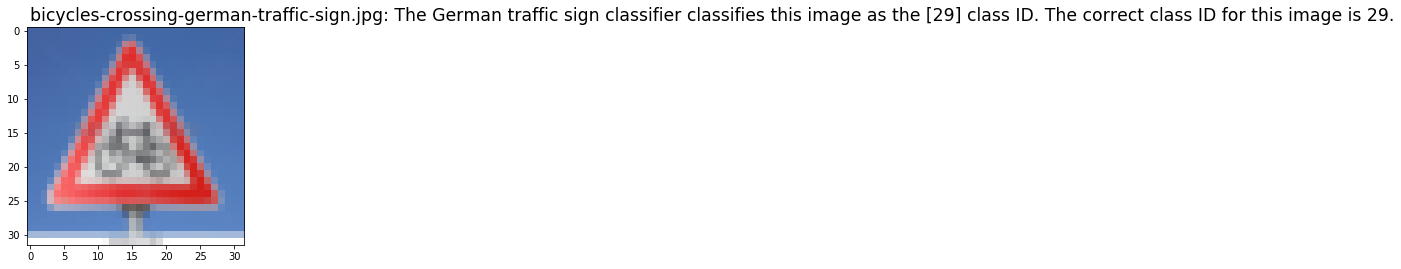

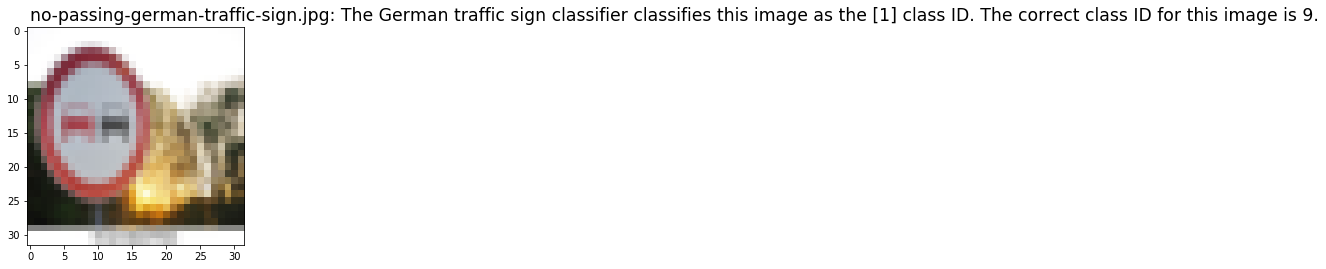

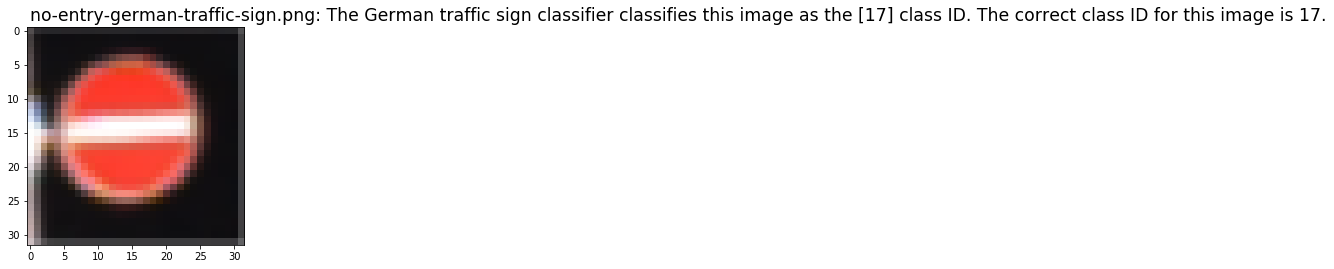

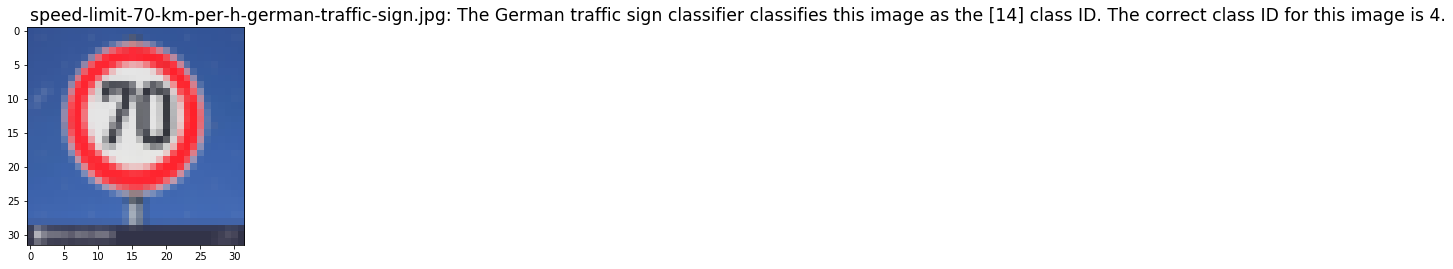

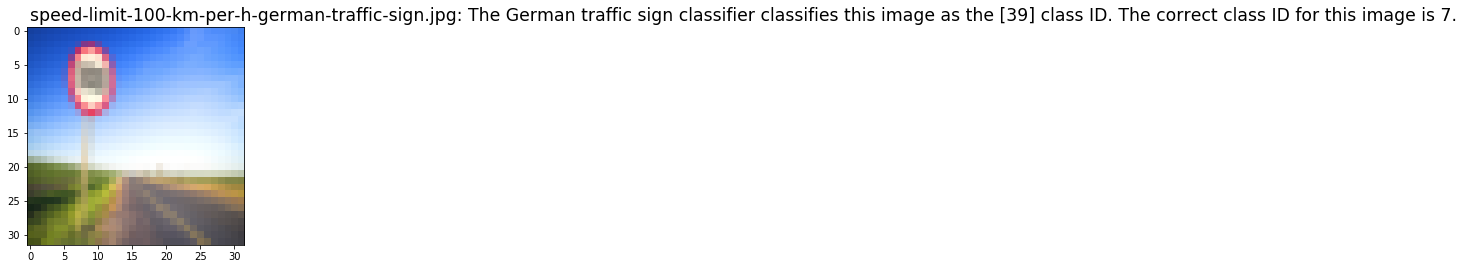

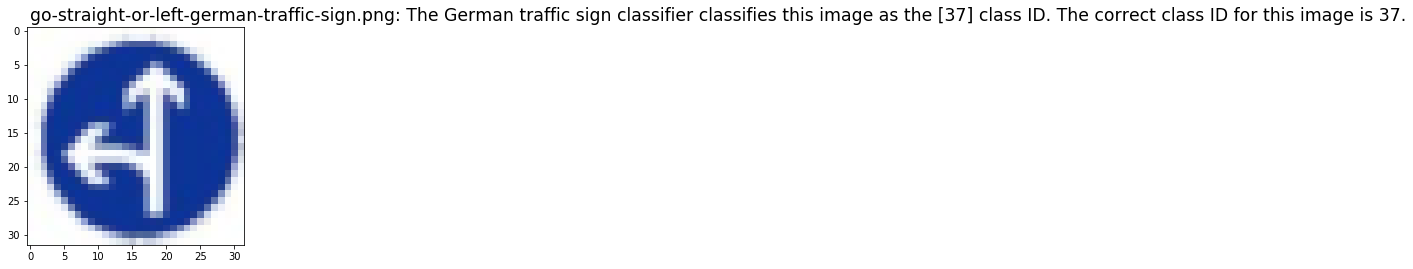

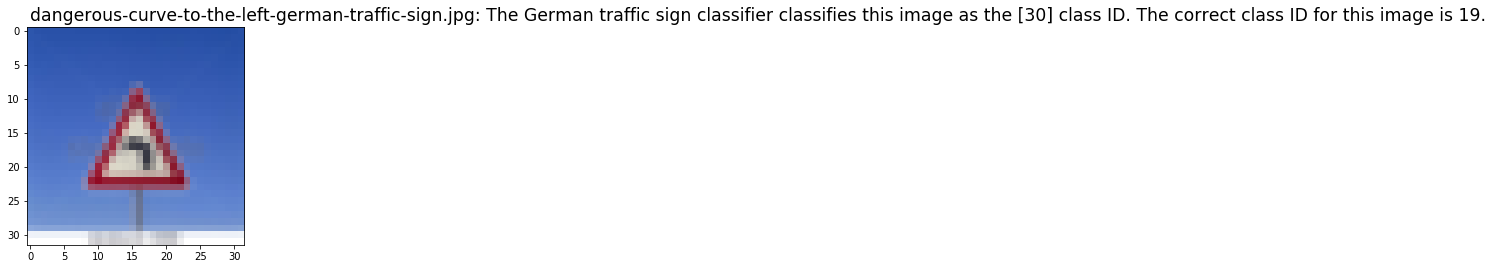

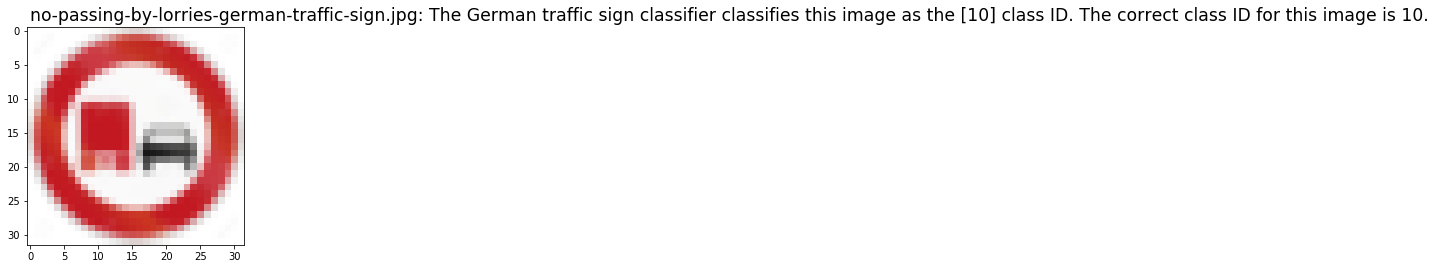

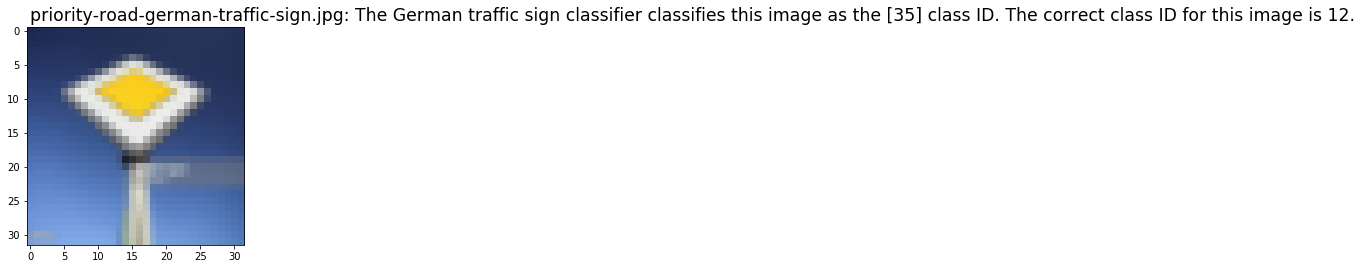

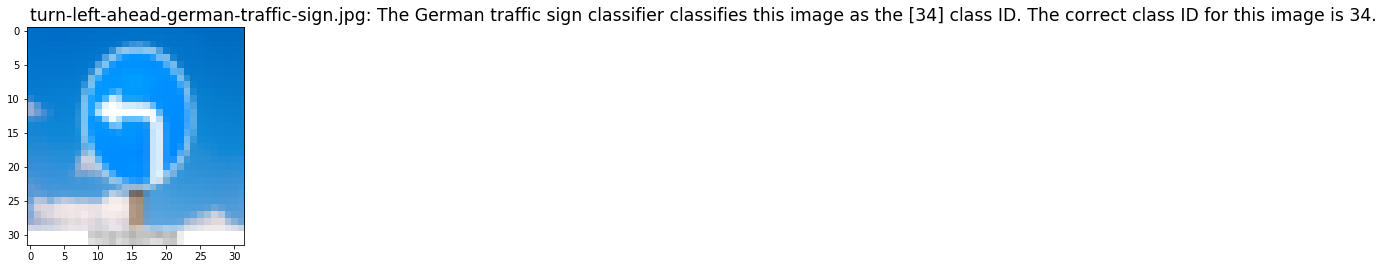

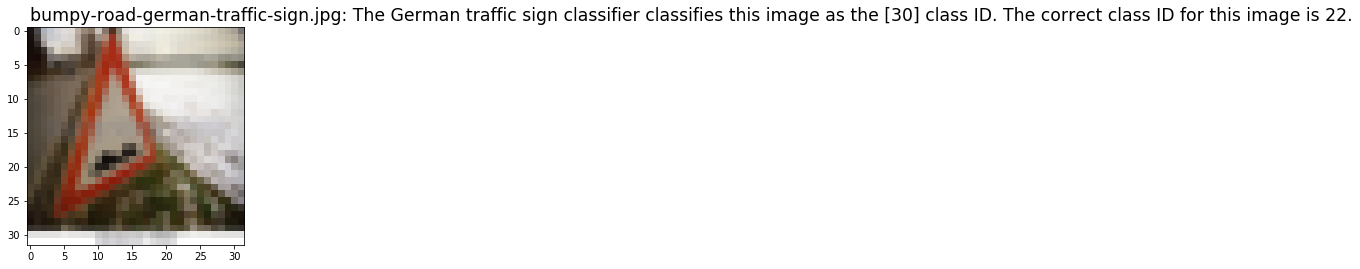

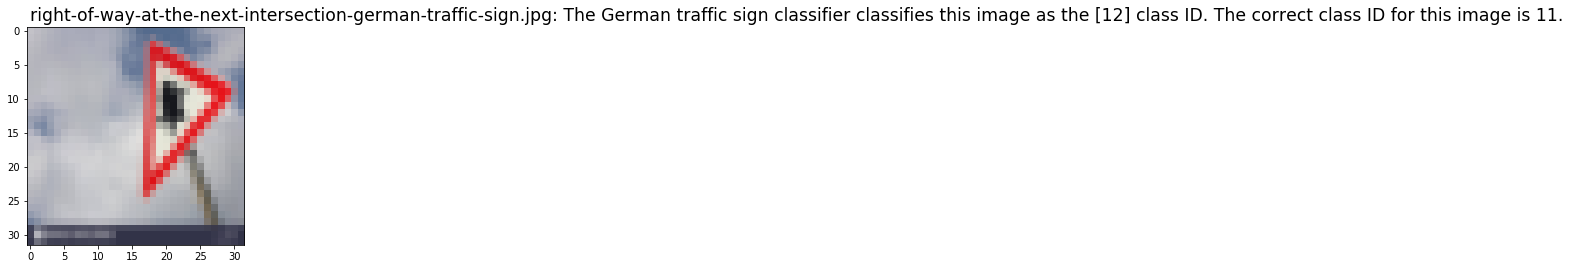

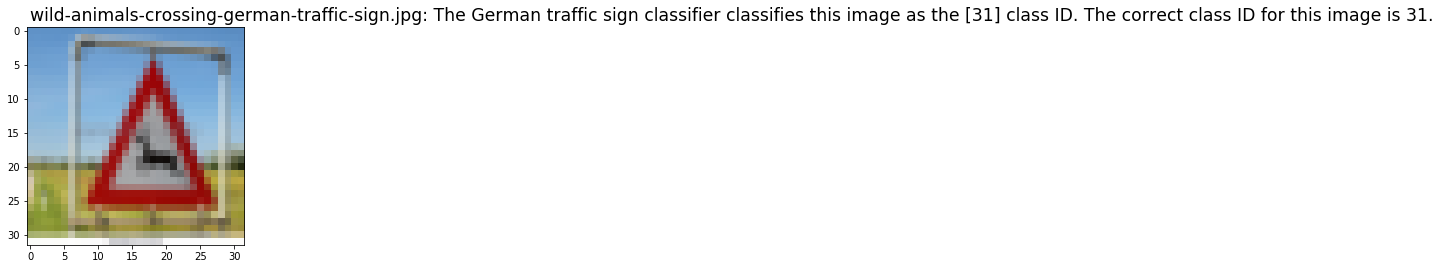

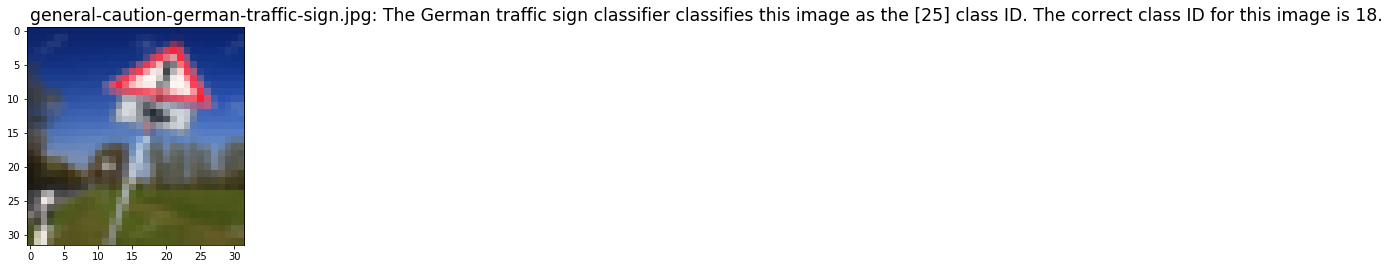

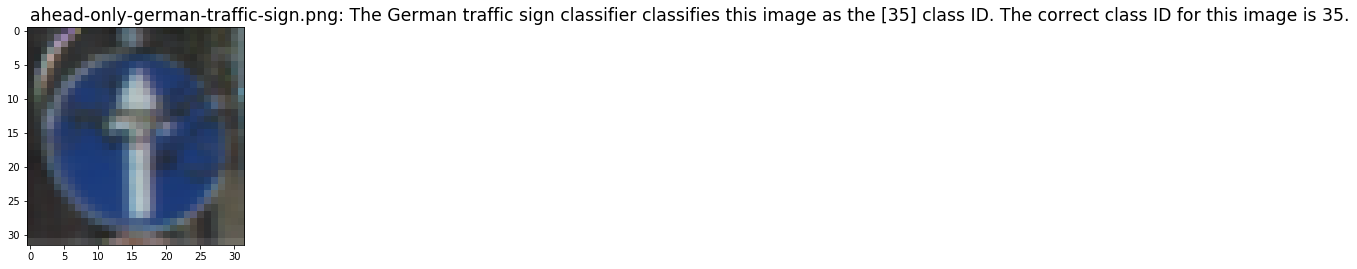

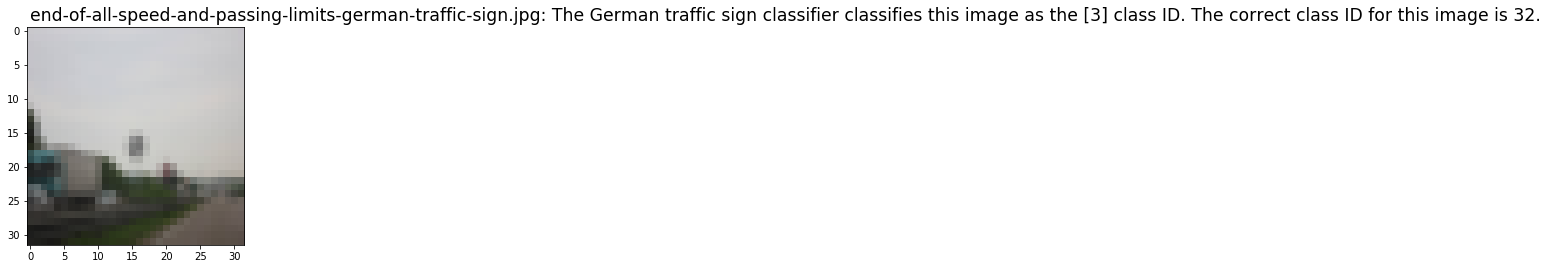

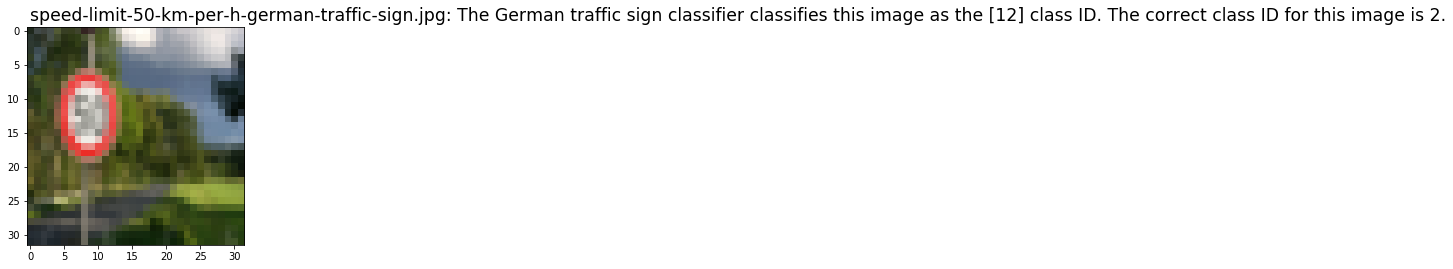

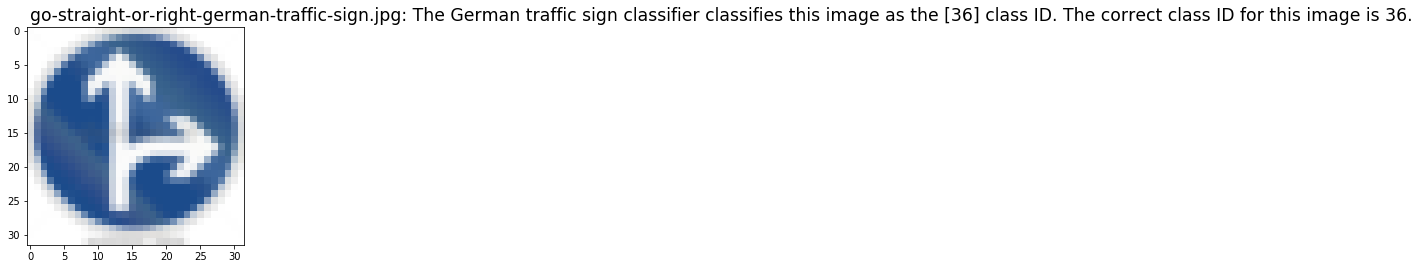

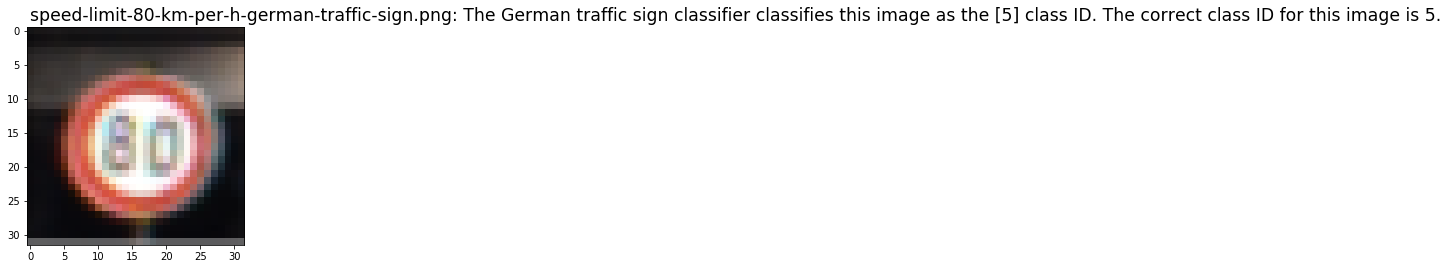

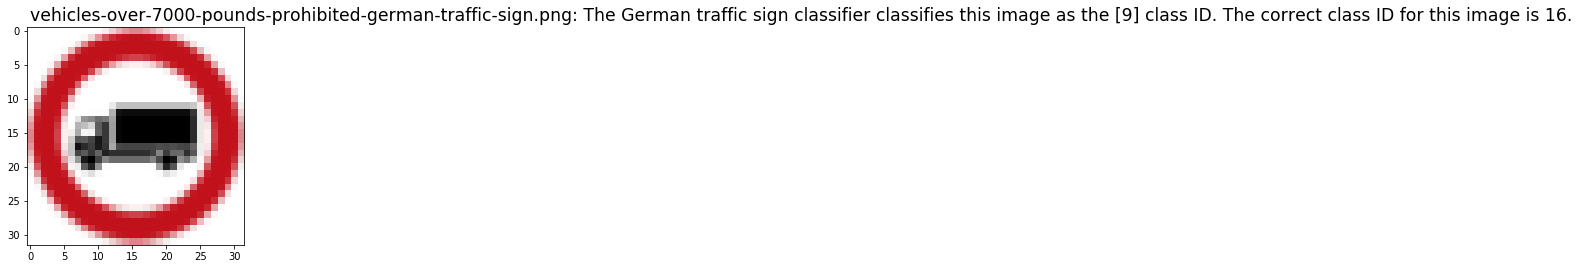

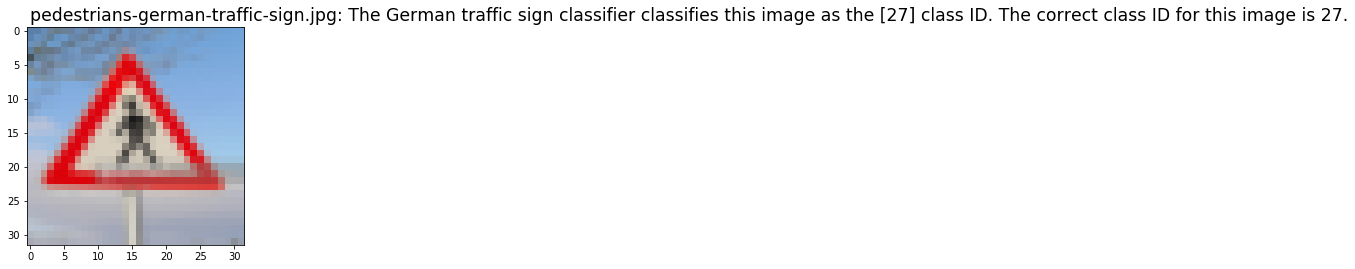

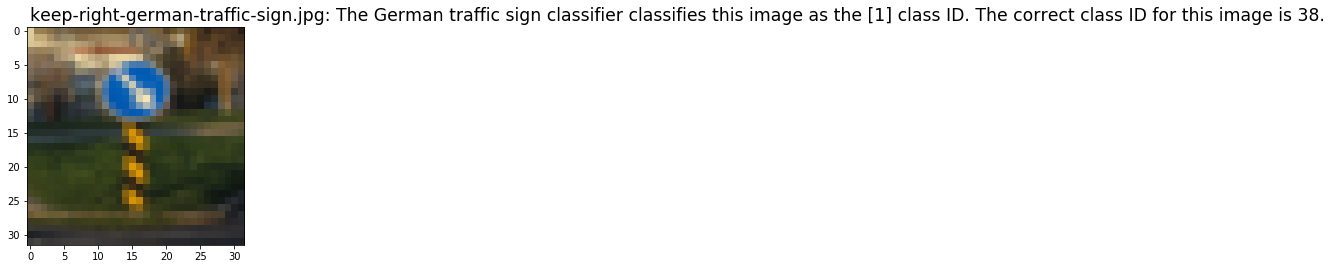

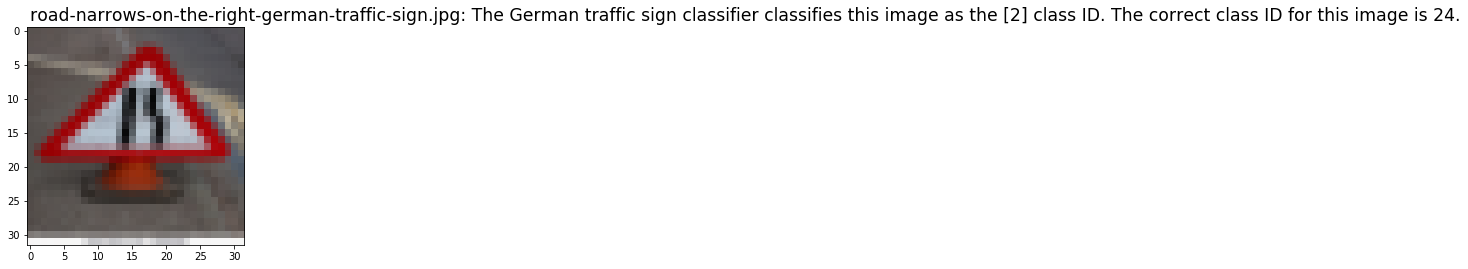

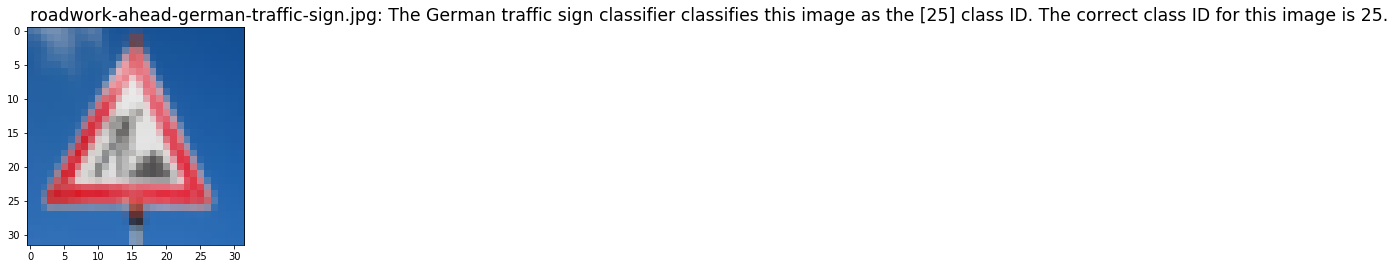

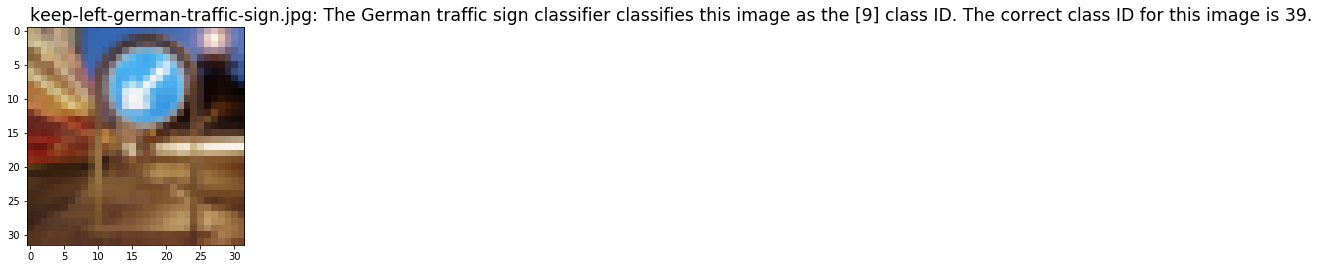

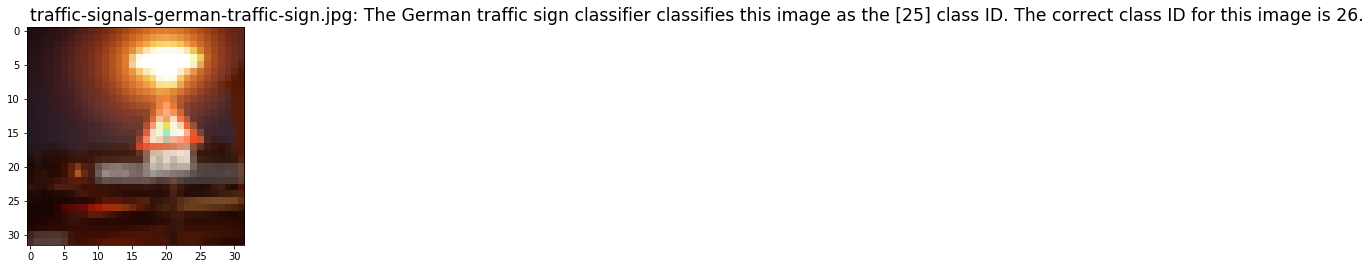

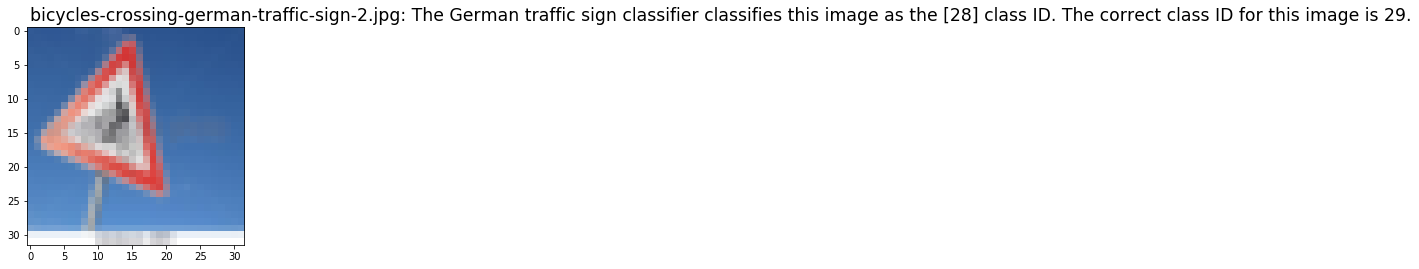

In [13]:
for image_file_name in image_file_name_list:
    plt.figure()
    plt.text(0, -1.5, '{}: The German traffic sign classifier classifies this image as the {} class ID. The correct class ID \
for this image is {}.'.format(image_file_name, file_name_to_prediction_dictionary[image_file_name], 
                              file_name_to_id_dictionary[image_file_name]), size='xx-large')
    plt.imshow(file_name_to_image_dictionary[image_file_name])

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Modification: I am calculating the accuracy on all above images.

def get_test_examples_and_labels(image_file_name_list):
    test_images_batch = np.array([file_name_to_image_dictionary[image_file_name] for image_file_name in image_file_name_list])
    test_images_labels = np.array([file_name_to_id_dictionary[image_file_name] for image_file_name in image_file_name_list])
    return (test_images_batch, test_images_labels)

test_images_batch, test_images_labels = get_test_examples_and_labels(image_file_name_list=image_file_name_list)
test_images_labels_one_hot_encoded = tf.one_hot(indices=test_images_labels, depth=n_classes)

with tf.Session() as sess:
    saver.restore(sess, restore_directory)
    print('Classification accuracy on {} test images from the internet: {}'.format(len(test_images_batch),
        evaluate_accuracy(X_data=test_images_batch, y_data=test_images_labels, sess=sess)))

Classification accuracy on 44 test images from the internet: 0.43181818452748383


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

/home/amhamor/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


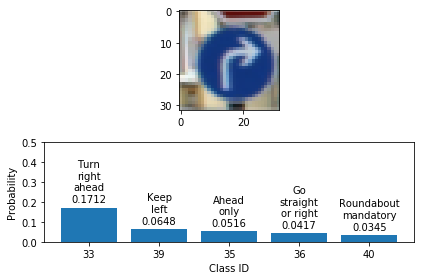

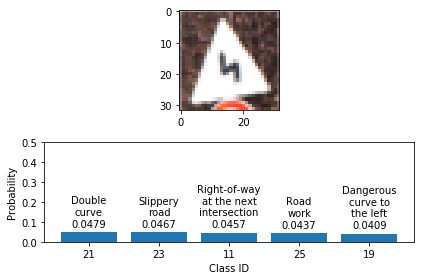

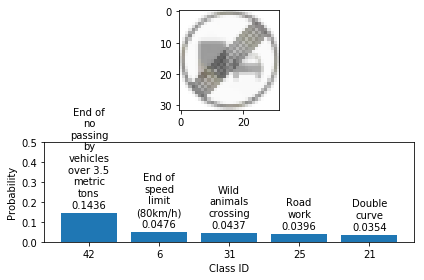

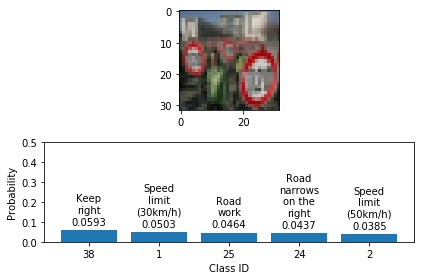

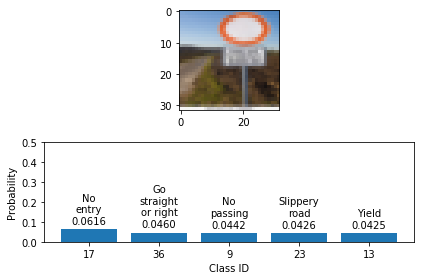

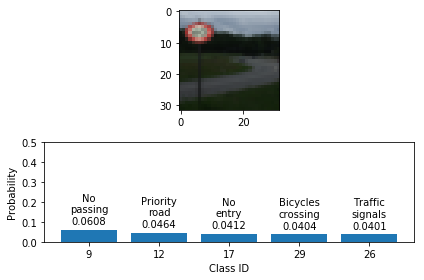

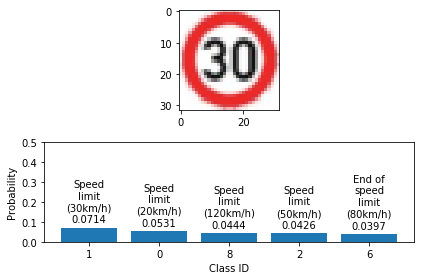

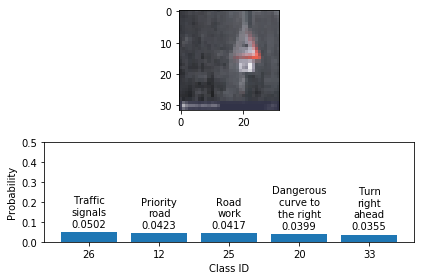

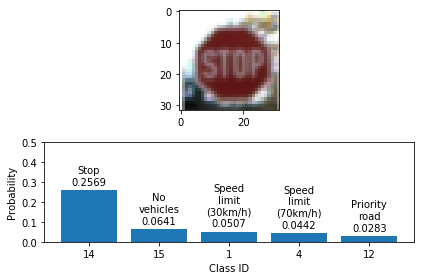

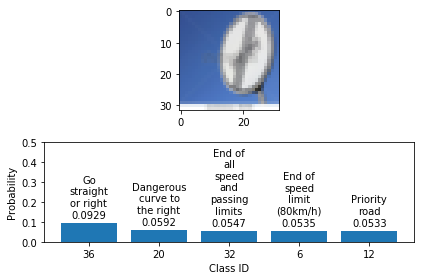

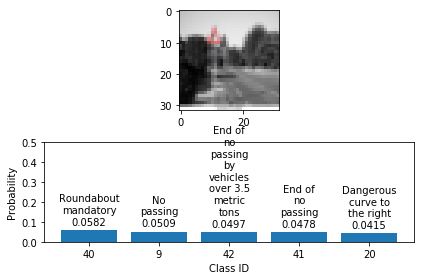

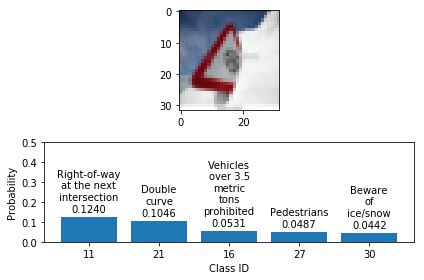

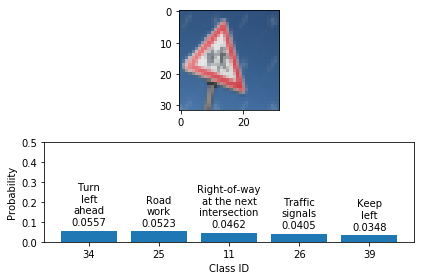

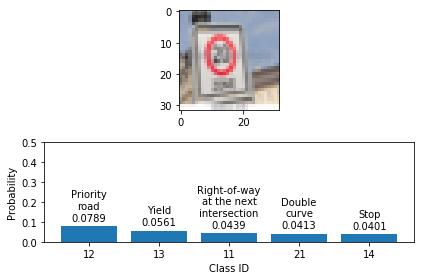

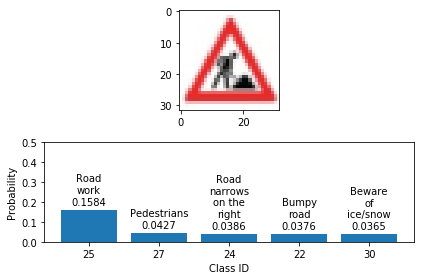

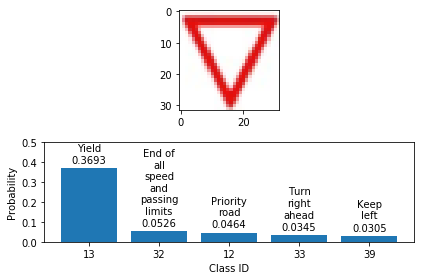

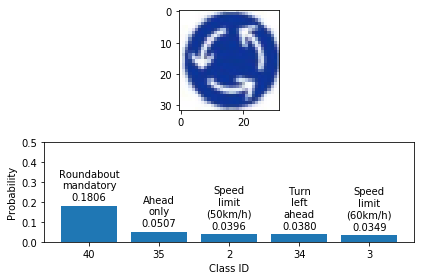

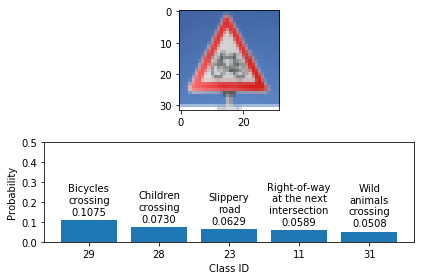

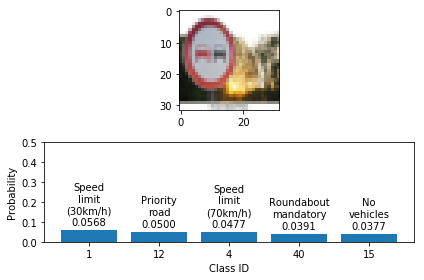

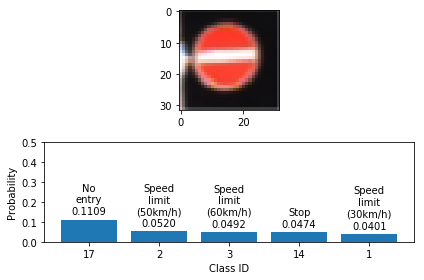

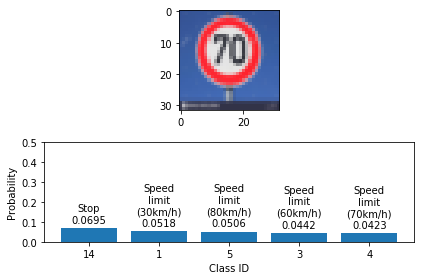

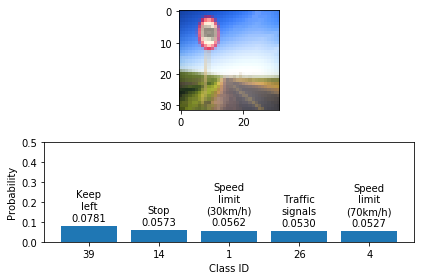

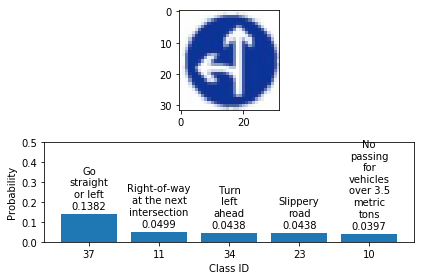

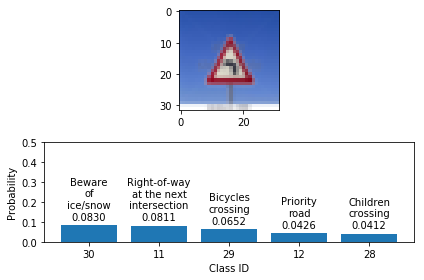

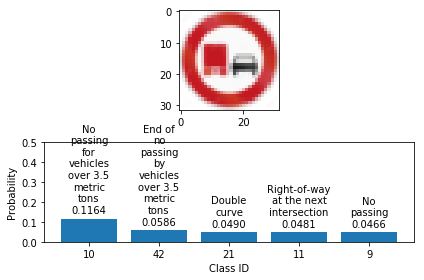

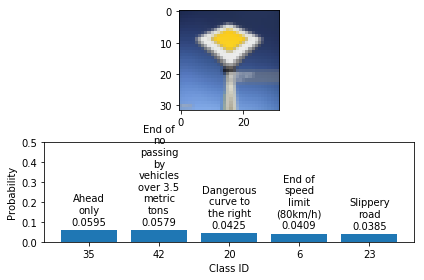

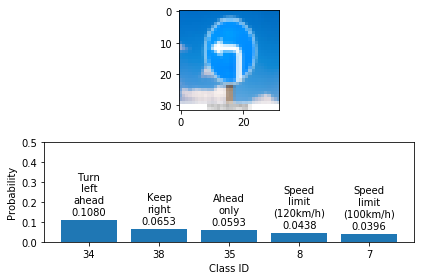

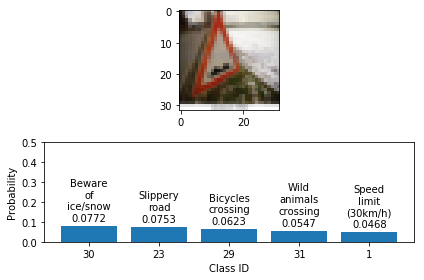

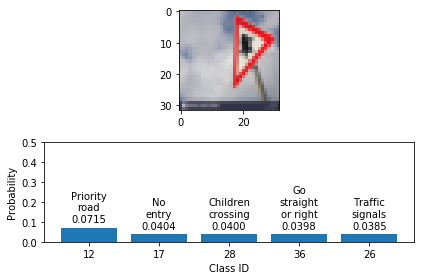

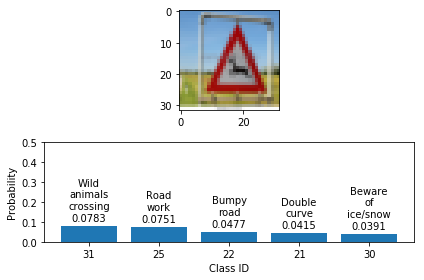

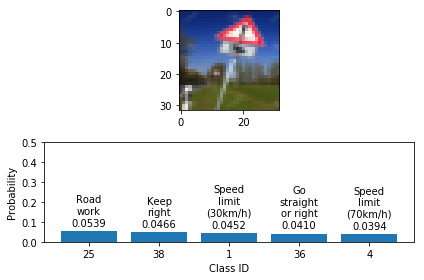

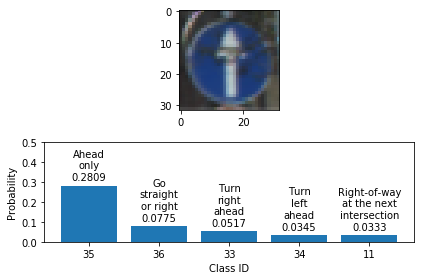

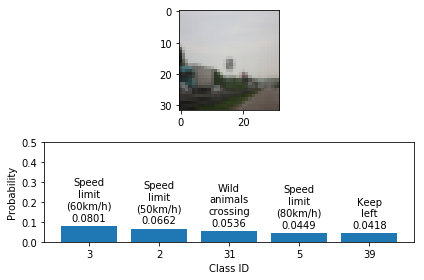

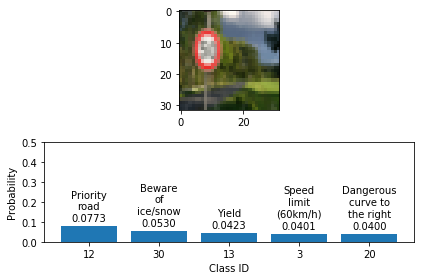

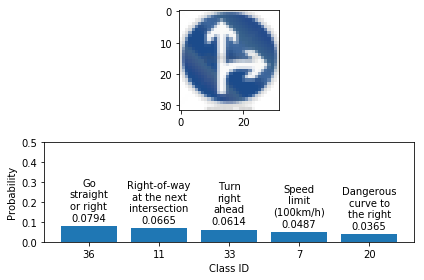

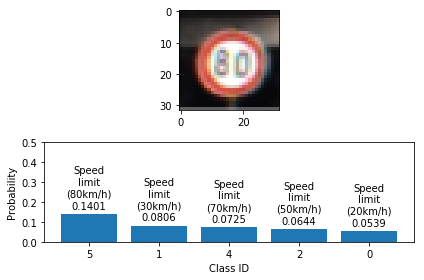

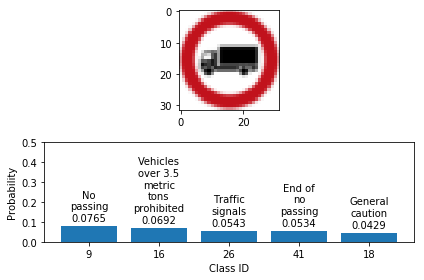

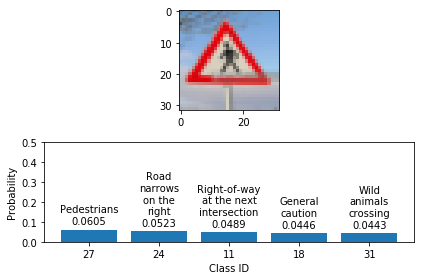

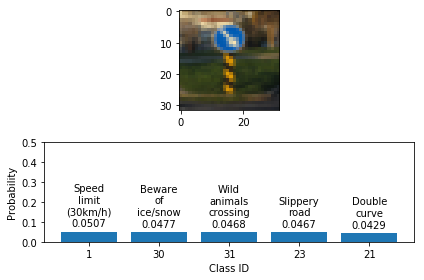

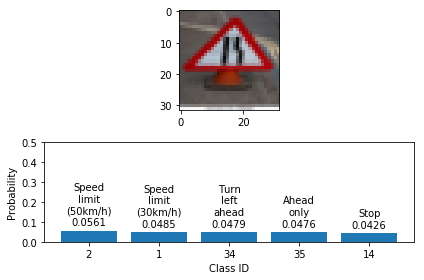

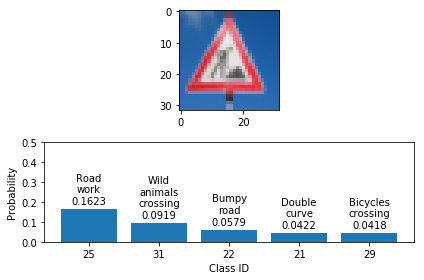

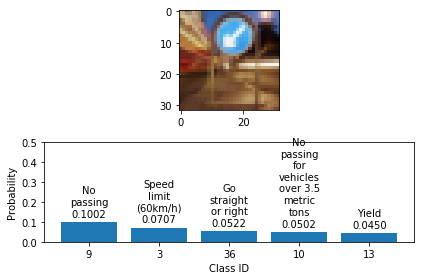

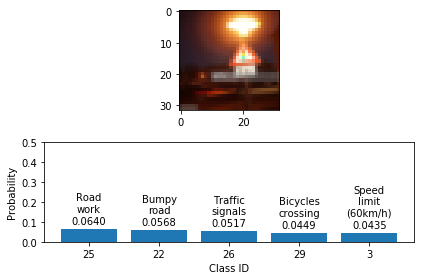

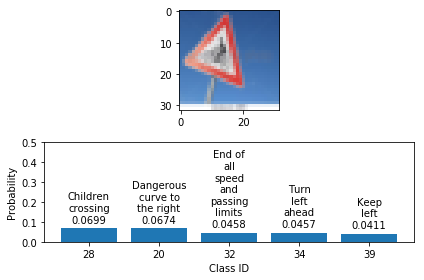

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import textwrap

with tf.Session() as sess:
    saver.restore(sess, restore_directory)
    for image_file_name in image_file_name_list:
        image = file_name_to_image_dictionary[image_file_name]
        image = np.expand_dims(image, axis=0)
        probabilities = sess.run(tf.nn.softmax(logits/1000), feed_dict={input_data: image})
        #print(sess.run(tf.reduce_sum(probabilities)))
        top_k = sess.run(tf.nn.top_k(tf.constant(probabilities), k=5))
        top_five_probabilities = top_k.values[0]
        top_five_indices = top_k.indices[0]
        #top_five_sign_names = [class_id_to_sign_name_dictionary[index] for index in top_five_indices]
        #print('Top five softmax probabilities for {}:'.format(image_file_name))
        #print(top_five_probabilities)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, sharey=False)
        image = file_name_to_image_dictionary[image_file_name]
        ax1.imshow(image)
        ax2.bar(left=range(len(top_five_probabilities)), height=top_five_probabilities, bottom=0, 
                tick_label=top_five_indices)
        plt.yticks(np.arange(0, 0.60, 0.10))
        plt.xlabel('Class ID')
        plt.ylabel('Probability')
        
        x_index = 0
        for index in range(len(top_five_probabilities)):
            probability = top_five_probabilities[index]
            class_id = top_five_indices[index]
            sign_name = class_id_to_sign_name_dictionary[class_id]
            longest_word_length = max([len(word) for word in sign_name.split()])
            ax2.text(x=x_index, y=probability+0.025, s='{:.4f}'.format(probability), horizontalalignment='center')
            ax2.text(x=x_index, y=probability+0.085, s = textwrap.fill(sign_name, width=longest_word_length),
                     horizontalalignment='center')
            x_index += 1
        
        plt.tight_layout()
        
        #save_directory = './softmax-probabilities/{}-softmax-probabilities.jpg'.format(image_file_name[:-4])
        #fig.savefig(save_directory)
        #print('Softmax probabilities saved at {}.'.format(save_directory))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excercise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


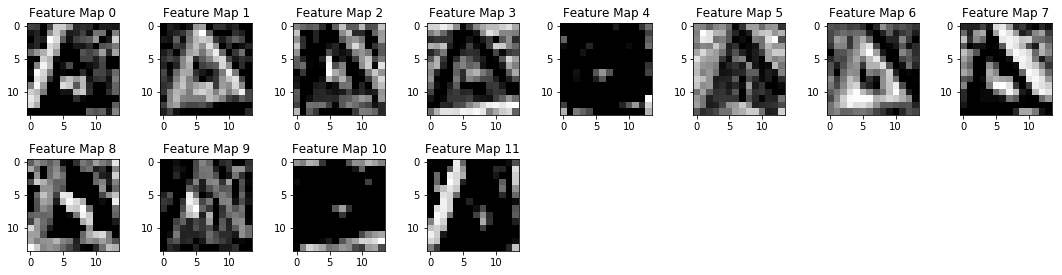

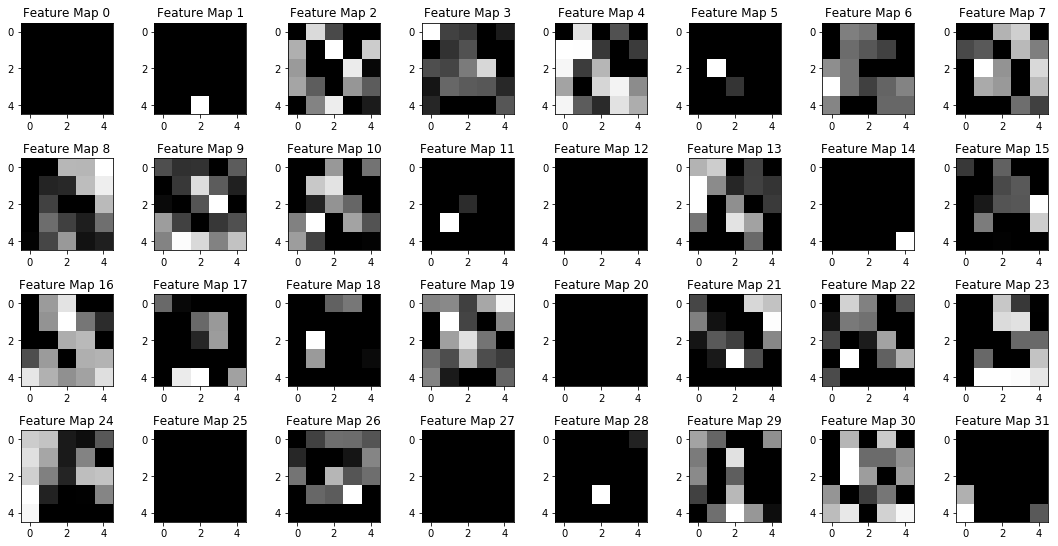

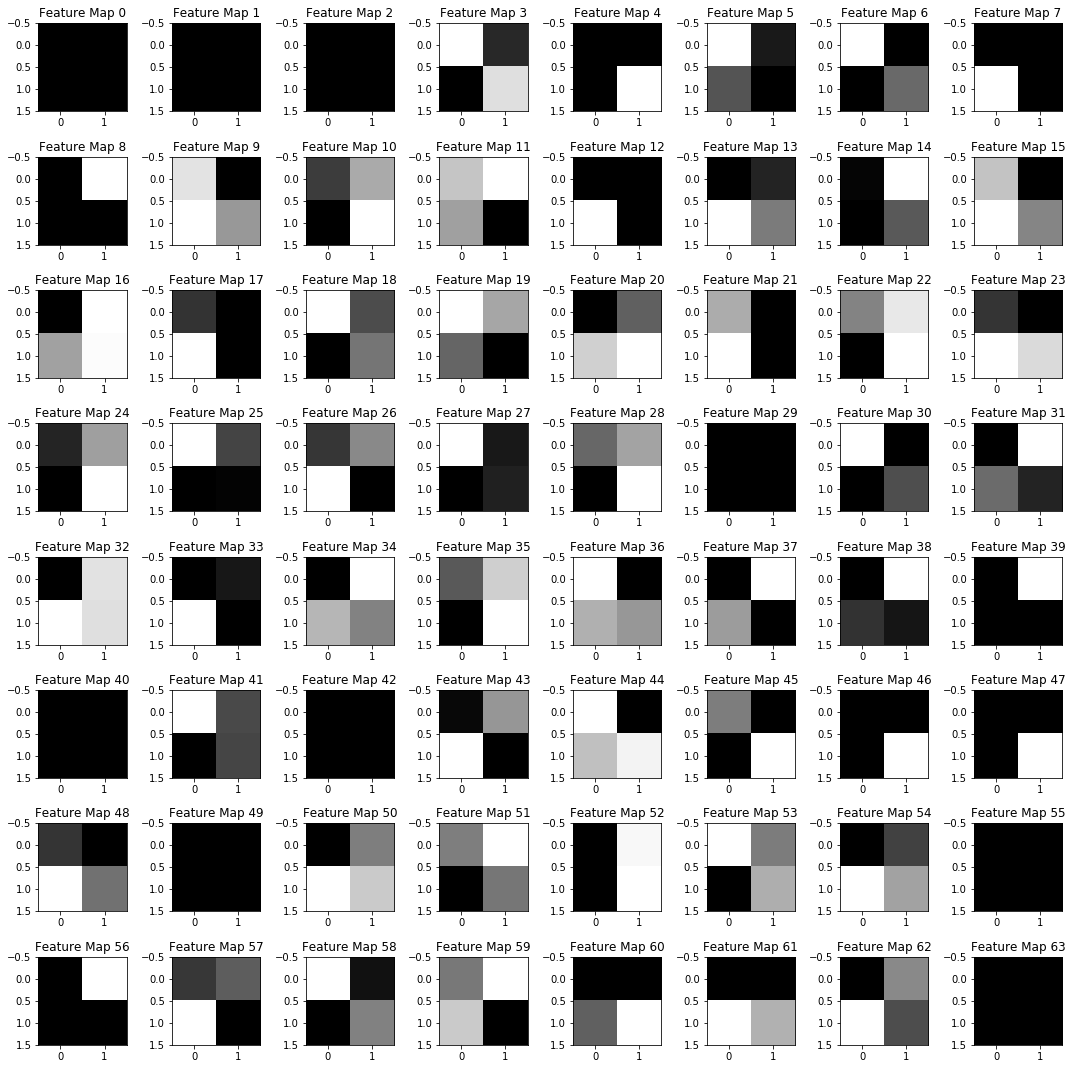

In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps.

# tf_activation: should be a tf variable name used during your training procedure that represents the calculated 
# state of a specific weight layer.

# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and 
# max to the actual min and max values of the output.

# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number 
# for each new feature map entry.

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed.
    image_input_flattened = flatten_array(array=image_input)
    image_input = normalize_pixel_values(pixel_array=image_input, pixel_array_flattened=image_input_flattened)
    # Note: x should be the same name as your network's tensorflow data placeholder variable.
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a 
    # function.
    activation = sess.run(tf_activation, feed_dict={input_data: image_input})
    feature_maps = activation.shape[3] # number of feature maps.
    plt.figure(plt_num, figsize=(15, 15))
    for feature_map in range(feature_maps):
        plt.subplot(8, 8, feature_map + 1) # sets the number of feature maps to show on each row and column
        plt.title('Feature Map ' + str(feature_map)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, feature_map], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, feature_map], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, feature_map], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, feature_map], interpolation="nearest", cmap="gray")
        plt.tight_layout()
    plt.savefig('./feature_maps/feature_map_{}.png'.format(tf_activation.name))
            
with tf.Session() as sess:
    saver.restore(sess, restore_directory)
    image_input = np.expand_dims(file_name_to_image_dictionary['double-curve-first-to-left-german-traffic-sign.png'], axis=0)
    outputFeatureMap(image_input=image_input, tf_activation=conv_layer1_normalized, plt_num=1)
    outputFeatureMap(image_input=image_input, tf_activation=conv_layer2_normalized, plt_num=2)
    outputFeatureMap(image_input=image_input, tf_activation=conv_layer3_normalized, plt_num=3)